## Multi-Layer Perceptron (MLP)

In [23]:
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

In [24]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

# preprocessing
X_train = X_train.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.2))
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.2))
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [25]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [26]:
val= net.fit(partial_X_train,partial_y_train,epochs=30, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/30
782/782 [==============================] - 19s 24ms/step - loss: 0.5126 - acc: 0.8140 - val_loss: 0.5284 - val_acc: 0.7947
Epoch 2/30
782/782 [==============================] - 18s 23ms/step - loss: 0.3675 - acc: 0.8655 - val_loss: 0.3792 - val_acc: 0.8626
Epoch 3/30
782/782 [==============================] - 19s 24ms/step - loss: 0.3305 - acc: 0.8787 - val_loss: 0.3665 - val_acc: 0.8657
Epoch 4/30
782/782 [==============================] - 18s 23ms/step - loss: 0.3041 - acc: 0.8878 - val_loss: 0.3512 - val_acc: 0.8718
Epoch 5/30
782/782 [==============================] - 18s 23ms/step - loss: 0.2855 - acc: 0.8928 - val_loss: 0.3831 - val_acc: 0.8584
Epoch 6/30
782/782 [==============================] - 19s 24ms/step - loss: 0.2719 - acc: 0.8997 - val_loss: 0.3044 - val_acc: 0.8880
Epoch 7/30
782/782 [==============================] - 18s 24ms/step - loss: 0.2580 - acc: 0.9029 - val_loss: 0.3262 - val_acc: 0.8837
Epoch 8/30
782/782 [==============================] - 21s 27ms

In [27]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4640 - acc: 0.8919


MLP를 학습하여 test 데이터에 적용하면 0.8919 정확도로 데이터를 분리한다.

## Convolutional Neural Networks

In [28]:
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

In [29]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

(9, <matplotlib.image.AxesImage at 0x7f530a9ec390>)

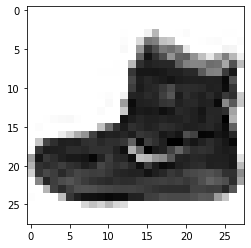

In [30]:
y_train[0], plt.imshow(X_train[0],cmap=plt.cm.binary)

In [31]:
np.shape(X_train[0])

(28, 28)

데이터는 흑백 데이터이므로 층을 하나로 나눔

In [32]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train/255

X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test/255

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [33]:
# 검증 데이터 설정
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [34]:
net = models.Sequential()

# 2D network를 만듦. filter를 32개를 쓰고, convolution할 픽셀은 3*3 픽셀
net.add(layers.Conv2D(64,(3,3), activation='relu', padding='same', input_shape=(28,28,1)))
# 2*2 matrix를 max pooling으로 픽셀을 줄임.
net.add(layers.MaxPooling2D((2,2)))

# max pooling한 것에 대해 다시 합성곱 실행
net.add(layers.Conv2D(64,(3,3), activation='relu',padding='same',)) 
net.add(layers.MaxPooling2D((2,2)))
net.add(layers.Conv2D(64,(3,3), activation='relu',padding='same',)) 
net.add(layers.MaxPooling2D((2,2)))
net.add(layers.Conv2D(64,(3,3), activation='relu', padding='same',))
net.add(layers.Flatten()) # matrix 결과로 나온 것을 1차원 벡터로 만들어줌.
# 1차원으로 만든 후 Dense layer를 쌓음.

net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.2))
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.2))
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])


In [35]:
net.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)         

In [36]:
validation= net.fit(partial_X_train,partial_y_train,epochs=30, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/30
782/782 [==============================] - 139s 177ms/step - loss: 0.5210 - acc: 0.8068 - val_loss: 0.4625 - val_acc: 0.8382
Epoch 2/30
782/782 [==============================] - 147s 187ms/step - loss: 0.3000 - acc: 0.8912 - val_loss: 0.2799 - val_acc: 0.8952
Epoch 3/30
782/782 [==============================] - 143s 183ms/step - loss: 0.2510 - acc: 0.9081 - val_loss: 0.2522 - val_acc: 0.9049
Epoch 4/30
782/782 [==============================] - 141s 180ms/step - loss: 0.2218 - acc: 0.9198 - val_loss: 0.2343 - val_acc: 0.9159
Epoch 5/30
782/782 [==============================] - 137s 176ms/step - loss: 0.1991 - acc: 0.9284 - val_loss: 0.2281 - val_acc: 0.9204
Epoch 6/30
782/782 [==============================] - 144s 184ms/step - loss: 0.1809 - acc: 0.9342 - val_loss: 0.2426 - val_acc: 0.9214
Epoch 7/30
782/782 [==============================] - 140s 179ms/step - loss: 0.1653 - acc: 0.9405 - val_loss: 0.2479 - val_acc: 0.9190
Epoch 8/30
782/782 [============================

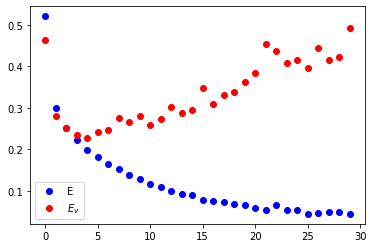

In [37]:
val_dict = validation.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

x = np.arange(0,len(loss))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='$E_v$')
plt.legend()

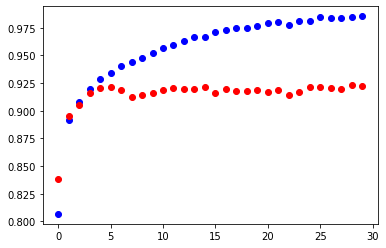

In [38]:
acc = val_dict['acc']
val_acc = val_dict['val_acc']
plt.plot(x,acc,'bo',label='Accuracy')
plt.plot(x,val_acc,'ro',label='A_v')

In [39]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.5800 - acc: 0.9159


convoltion을 적용한 뒤에 MLP와 같은 hyper parameter를 사용하여 학습을 하였더니 test data를 0.9159 정도의 정확도로 분류하였다.
위의 validation을 이용하여 분석한 그래프를 보면 parameter를 조정하여 training을 하면 정확도가 더 높아질 수 있을 것으로 보인다.